<a href="https://colab.research.google.com/github/Josh-Warren11/RandomNotes/blob/main/Project1_halfway%20done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Josh Warren

# Project \#1 Starter Code: 
Your first step is to decide which dataset you would like to work with for this project. You can find the data on Blackboard. 

The options include: 
- [Ramen Ratings](https://www.kaggle.com/residentmario/ramen-ratings)
- [Chocolate Ratings](https://www.kaggle.com/rtatman/chocolate-bar-ratings)
- [World Happiness Data](https://www.kaggle.com/unsdsn/world-happiness)
- [Heart Failure Prediction](https://www.kaggle.com/fedesoriano/heart-failure-prediction)

Let's start by taking a look at these different datasets. (you can get rid of this once you decide which one you want to use). 

In [1]:
from google.colab import drive
import sklearn
import numpy
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
drive.mount('/content/drive')
happiness =pd.read_csv('/content/drive/MyDrive/CS167/datasets/happiness_data.csv')
happiness.head()

Mounted at /content/drive


,Overall rank,Year,Country or region,Score,GDP per capita,Social support and Family,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,2018,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,2018,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,2018,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,2018,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,2018,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


# Problem: 
Which dataset are you going to use? What questions are you going to ask about this dataset? Make sure that you can answer the question using ML models. What are your predictor variables and target variable?

I am planning to use the World Happiness data. I am planning to ask how much each category impacts the overall happiness score of nations. My predictor variables would be GDP per capita,	Social support and Family, Healthy life expectancy,	Freedom to make life choices, Generosity, and	Perceptions of corruption. My target variable would be the Happiness Score. I am attempting to solve which model will best predict the world happiness of a country.

# Data Preparation
Explain your data prep. What did you do to get your data in the shape for your experiments? (e.g. creation of dummy variables, filling in missing values, etc). 

This data only had one missing value, so by using dropna, it are only losing one row of data. This is effective and does not skew the data in any direction. Next, I defined the predictor and target variable, splitting them into training and testing data and solutions. This is essential because the models have to effectively learn an the relationship of inputs to outputs.

In [2]:
# data prep code
clean_happiness = happiness.dropna()

predictors = ['Year', 'GDP per capita', 'Social support and Family', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
target = ['Score']
train_data, test_data, train_sln, test_sln = \
        train_test_split(clean_happiness[predictors], clean_happiness[target], test_size = 0.2, random_state=41)
test_sln

,Score
334,6.609
604,3.956
144,3.632
701,5.268
21,6.627
...,...
43,6.096
260,4.796
536,5.538
500,6.379


In [3]:
print('train_data shape: ',train_data.shape)
print('test_data shape: ',test_data.shape)
print('train_sln shape: ',train_sln.shape)
print('test_sln shape: ',test_sln.shape)

train_data shape:  (624, 7)
test_data shape:  (157, 7)
train_sln shape:  (624, 1)
test_sln shape:  (157, 1)


# Metrics
Identify which metrics you will be using to test your model and say why they are appropriate.

The world happiness score along with its predictor variables are all numeric. They are all real-valued labels, making the models needed to test the data regression models. 

The world happiness score along with its predictor variables are all numeric. I will be using Mean Absolute Error. They are all real-valued labels, making the models needed to test the data regression models. 

# Baseline Performance
Identify a baseline for your metrics - what would you expect to happen with this particular data if you always guessed the average or if you guessed randomly? What did some of the unsuccessful machine learning algorithms yield?

Some helpful links:
- [Sklearn Dummy Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)

In [4]:
from sklearn.dummy import DummyRegressor
from sklearn import metrics

dummy_regr = DummyRegressor() # will always predict the average of the target
dummy_regr.fit(train_data, train_sln)
preds = dummy_regr.predict(test_data)

print('MAE: ', metrics.mean_absolute_error(test_sln, preds))

MAE:  0.9230393053044565


# Model planning and Execution
Identify which learning algorithms you have tried and which important parameters you’ve tuned for each one.


I tuned the k for k nearest neighbors and I have tuned the m of hte max depth for decision trees.

KNN Regression

In [5]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 12)
knn.fit(train_data, train_sln)
prediction = knn.predict(test_data)
from sklearn.metrics import mean_absolute_error
print("MAE: ", mean_absolute_error(test_sln, prediction))

MAE:  0.42170329240870486


Weighted KNN 

In [6]:
w_knn = KNeighborsRegressor(n_neighbors= 12, weights = 'distance')
w_knn.fit(train_data, train_sln)
prediction = w_knn.predict(test_data)
print("MAE: ", mean_absolute_error(test_sln, prediction))

MAE:  0.4161130599600345


Decision Tree

MAE: 0.5377764067887651


[Text(558.0, 951.3000000000001, 'X[1] <= 1.062\nmse = 1.276\nsamples = 624\nvalue = 5.378'),
 Text(279.0, 679.5, 'X[3] <= 0.468\nmse = 0.734\nsamples = 370\nvalue = 4.743'),
 Text(139.5, 407.70000000000005, 'X[2] <= 0.163\nmse = 0.339\nsamples = 164\nvalue = 4.166'),
 Text(69.75, 135.89999999999998, 'mse = 0.086\nsamples = 10\nvalue = 3.178'),
 Text(209.25, 135.89999999999998, 'mse = 0.288\nsamples = 154\nvalue = 4.23'),
 Text(418.5, 407.70000000000005, 'X[4] <= 0.424\nmse = 0.573\nsamples = 206\nvalue = 5.203'),
 Text(348.75, 135.89999999999998, 'mse = 0.346\nsamples = 103\nvalue = 4.882'),
 Text(488.25, 135.89999999999998, 'mse = 0.594\nsamples = 103\nvalue = 5.523'),
 Text(837.0, 679.5, 'X[4] <= 0.532\nmse = 0.623\nsamples = 254\nvalue = 6.303'),
 Text(697.5, 407.70000000000005, 'X[2] <= 0.975\nmse = 0.418\nsamples = 160\nvalue = 5.911'),
 Text(627.75, 135.89999999999998, 'mse = 0.425\nsamples = 52\nvalue = 5.471'),
 Text(767.25, 135.89999999999998, 'mse = 0.277\nsamples = 108\nvalu

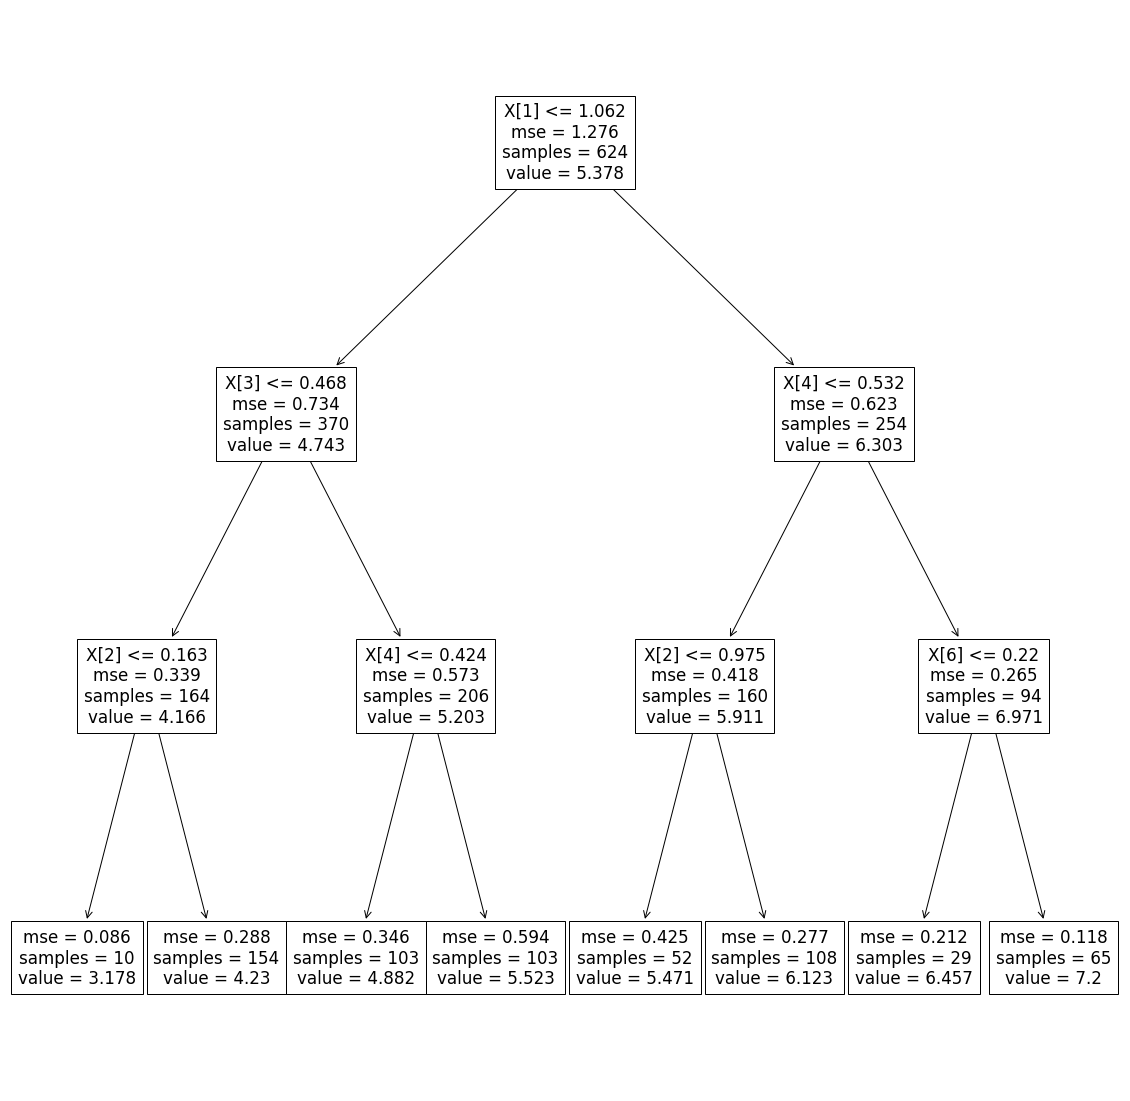

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
regular = tree.DecisionTreeRegressor(random_state=11, max_depth= 3)
regular.fit(train_data, train_sln)
score_predictions = regular.predict(test_data)
print("MAE:", metrics.mean_absolute_error(test_sln,score_predictions))
plt.figure(figsize=(20,20))
tree.plot_tree(regular)

Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state = 41, n_estimators=100)
forest.fit(train_data,train_sln)
predictions = forest.predict(test_data)
print("MAE: ", metrics.mean_absolute_error(test_sln,predictions))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MAE:  0.3808425455955657


Normalized data

In [13]:
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalize = scaler.transform(train_data)
test_data_normalize = scaler.transform(test_data)

Normal KNN

In [14]:
knn = KNeighborsRegressor(n_neighbors = 12)
knn.fit(train_data_normalize, train_sln)
prediction = knn.predict(test_data_normalize)
print("MAE: ", mean_absolute_error(test_sln, prediction))

MAE:  0.4067967141374734


Normal w-KNN

In [15]:
w_knn = KNeighborsRegressor(n_neighbors= 12, weights = 'distance')
w_knn.fit(train_data_normalize, train_sln)
prediction = w_knn.predict(test_data_normalize)
print("MAE: ", mean_absolute_error(test_sln, prediction))

MAE:  0.40090239161330216


Normal Decision Tree

MAE: 0.49803489188930844


[Text(558.0, 978.48, 'X[1] <= 0.363\nmse = 1.276\nsamples = 624\nvalue = 5.378'),
 Text(279.0, 761.0400000000001, 'X[3] <= -0.579\nmse = 0.734\nsamples = 370\nvalue = 4.743'),
 Text(139.5, 543.6, 'X[2] <= -2.487\nmse = 0.339\nsamples = 164\nvalue = 4.166'),
 Text(69.75, 326.1600000000001, 'X[4] <= -0.222\nmse = 0.086\nsamples = 10\nvalue = 3.178'),
 Text(34.875, 108.72000000000003, 'mse = 0.051\nsamples = 7\nvalue = 3.038'),
 Text(104.625, 108.72000000000003, 'mse = 0.018\nsamples = 3\nvalue = 3.504'),
 Text(209.25, 326.1600000000001, 'X[4] <= -1.14\nmse = 0.288\nsamples = 154\nvalue = 4.23'),
 Text(174.375, 108.72000000000003, 'mse = 0.179\nsamples = 33\nvalue = 3.874'),
 Text(244.125, 108.72000000000003, 'mse = 0.273\nsamples = 121\nvalue = 4.328'),
 Text(418.5, 543.6, 'X[4] <= 0.081\nmse = 0.573\nsamples = 206\nvalue = 5.203'),
 Text(348.75, 326.1600000000001, 'X[4] <= -1.414\nmse = 0.346\nsamples = 103\nvalue = 4.882'),
 Text(313.875, 108.72000000000003, 'mse = 0.421\nsamples = 24\

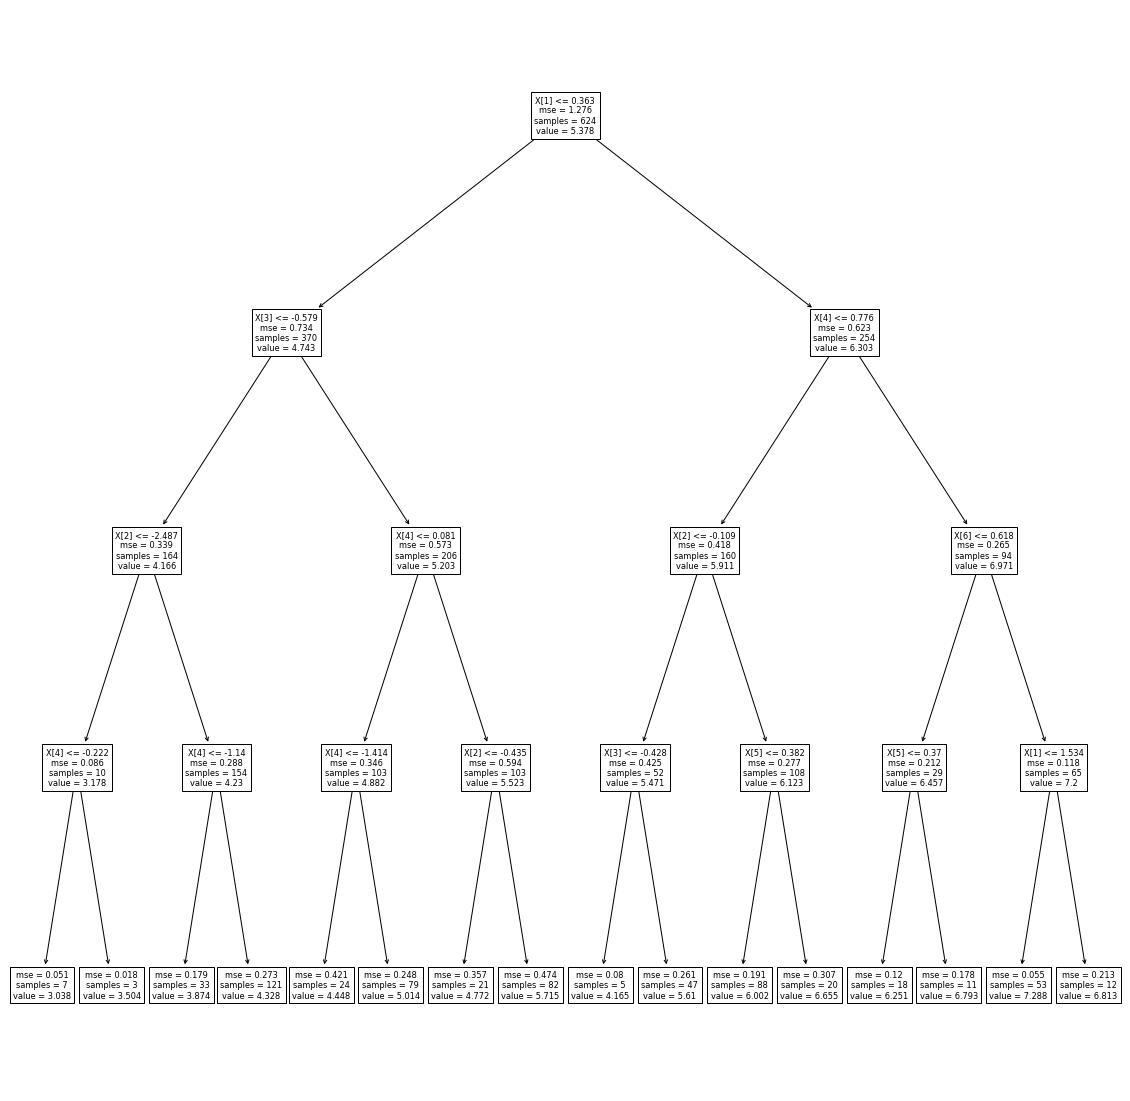

In [33]:
regular = tree.DecisionTreeRegressor(random_state=11, max_depth= 4)
regular.fit(train_data_normalize, train_sln)
score_predictions = regular.predict(test_data_normalize)
print("MAE:", metrics.mean_absolute_error(test_sln,score_predictions))
plt.figure(figsize=(20,20))
tree.plot_tree(regular)

Normal Random Forest

In [36]:
forest = RandomForestRegressor(random_state = 41, n_estimators=1000)
forest.fit(train_data_normalize,train_sln)
predictions = forest.predict(test_data_normalize)
print("MAE: ", metrics.mean_absolute_error(test_sln,predictions))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


MAE:  0.37816124673292284


# Results
After you conduct your learning experiment, summarize the results you got. Include visualizations (i.e. graphs) where appropriate.  How did you find the best k, n, m or other variables that you needed to tune. 

In order to find the most efficient k for KNN, I did a broad search of many different neighbors to see which area had the lowest output. This graph plots the number of K's on the x axis and the Mean Absolute Error (MAE) on the y axis.

Graph of knn parameter broad

[0.4250248419267516, 0.430921981228981, 0.5224133789175796, 0.6156047811689173, 0.6808079682313694, 0.8703264113903914, 0.8494468700656193, 0.8845451007605478, 0.8860303889243631]


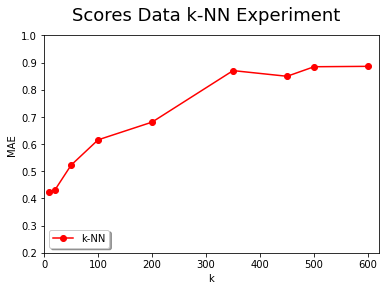

In [20]:
import matplotlib.pyplot as plt

k_vals = [10, 20, 50, 100, 200, 350, 450, 500, 600]
kNN_MAE = []

for k in k_vals:
  knn_small = neighbors.KNeighborsRegressor(n_neighbors= k)
  knn_small.fit(train_data , train_sln)
  predictions = knn_small.predict(test_data)
  current_MAE = metrics.mean_absolute_error(test_sln,predictions)
  kNN_MAE.append(current_MAE)

print(kNN_MAE)

plt.suptitle('Scores Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('MAE')
plt.plot(k_vals,kNN_MAE,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,620,0.2,1])

plt.show()


I noticed that there was a large increase after 30 or so nearest neighbors. I then decided to make a more focued KNN graph to display what the best amount of neighbors is correct. I also printed out the KNN mean absolute error so I can visually see the numbers. A number is much more accurate than eyeballing a graph. Seeing this allows me to tune the variable to the best of its ability and create the lowest Mean Absolute Error as possible given the data. 
This KNN function allowed me to see that 12 nearest neighbors was the k necessary to create the lowest MAE.

KNN parameter focused

[0.46130892061464956, 0.4446613541369425, 0.43106210256687894, 0.4250248419267516, 0.4264869734047481, 0.42170329240870486, 0.4252766169399455, 0.4290816122659236, 0.42525442744019815, 0.430921981228981, 0.4418174158840234, 0.4554409821246285]


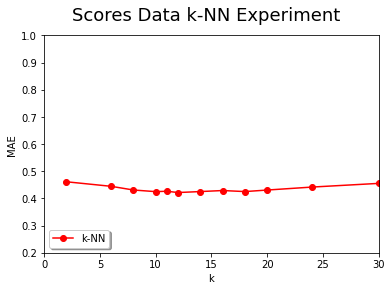

In [21]:
k_vals = [2, 6, 8, 10, 11, 12, 14, 16, 18, 20, 24, 30]
kNN_MAE = []

for k in k_vals:
  knn_small = neighbors.KNeighborsRegressor(n_neighbors= k)
  knn_small.fit(train_data , train_sln)
  predictions = knn_small.predict(test_data)
  current_MAE = metrics.mean_absolute_error(test_sln,predictions)
  kNN_MAE.append(current_MAE)

print(kNN_MAE)

plt.suptitle('Scores Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('MAE')
plt.plot(k_vals,kNN_MAE,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,30,0.2,1])

plt.show()

In order to find the most efficient k for Weighted-KNN, I did a broad search of many different neighbors to see which area had the lowest output. This graph plots the number of K's on the x axis and the Mean Absolute Error (MAE) on the y axis.

Weighted KNN parameter graph broad

[0.4208567638297085, 0.41968678574465096, 0.47109756312145745, 0.535886852909605, 0.5949364919477816, 0.7214519851293784, 0.7299327400355197, 0.7493648942226806, 0.7616799523306644]


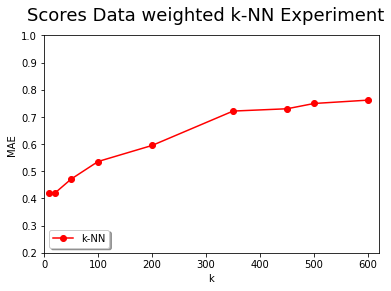

In [22]:
import matplotlib.pyplot as plt

k_vals = [10, 20, 50, 100, 200, 350, 450, 500, 600]
kNN_MAE = []

for k in k_vals:
  wknn_small = neighbors.KNeighborsRegressor(n_neighbors= k, weights= 'distance')
  wknn_small.fit(train_data , train_sln)
  predictions = wknn_small.predict(test_data)
  current_MAE = metrics.mean_absolute_error(test_sln,predictions)
  kNN_MAE.append(current_MAE)

print(kNN_MAE)

plt.suptitle('Scores Data weighted k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('MAE')
plt.plot(k_vals,kNN_MAE,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,620,0.2,1])

plt.show()

I noticed that there was a large increase after 30 or so nearest neighbors. I then decided to make a more focued Weighted-KNN graph to display what the best amount of neighbors is correct. I also printed out the Weighted-KNN mean absolute error so I can visually see the numbers. A number is much more accurate than eyeballing a graph. Seeing this allows me to tune the variable to the best of its ability and create the lowest Mean Absolute Error as possible given the data. 
This Weighted-KNN function allowed me to see that 12 nearest neighbors was the k necessary to create the lowest MAE.

Weighted KNN graph focused

[0.46516711335159566, 0.4383275401240064, 0.4258253890256989, 0.4208567638297085, 0.4209049192585666, 0.4161130599600345, 0.41807107755355755, 0.4210013507899261, 0.4180482983739323, 0.41968678574465096, 0.4243369151338612, 0.4320905109129015]


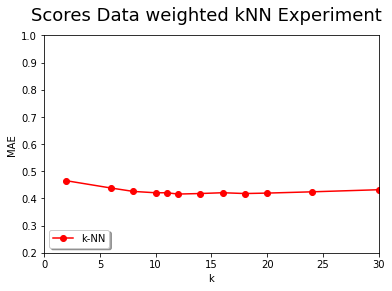

In [23]:
import matplotlib.pyplot as plt

k_vals = [2, 6, 8, 10, 11, 12, 14, 16, 18, 20, 24, 30]
kNN_MAE = []

for k in k_vals:
  wknn_small = neighbors.KNeighborsRegressor(n_neighbors= k, weights= 'distance')
  wknn_small.fit(train_data , train_sln)
  predictions = wknn_small.predict(test_data)
  current_MAE = metrics.mean_absolute_error(test_sln,predictions)
  kNN_MAE.append(current_MAE)

print(kNN_MAE)

plt.suptitle('Scores Data weighted kNN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('MAE')
plt.plot(k_vals,kNN_MAE,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,30,0.2,1])

plt.show()

In order to find the most efficient n for this Decision Tree, I did a broad search of many different nodes to see which area had the lowest output. This graph plots the number of n's on the x axis and the Mean Absolute Error (MAE) on the y axis.

Decision Tree graph

[0.5263321338509994, 0.535191075687898, 0.5698089159458598, 0.5777770664426751, 0.5293057256815287, 0.5216050874140127, 0.5391910735509553, 0.5613885260732483, 0.5548152805445858]


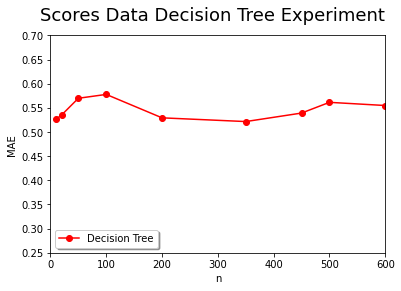

In [28]:
n_vals = [10, 20, 50, 100, 200, 350, 450, 500, 600]
dt_MAE = []

for n in n_vals:
  dt_small = tree.DecisionTreeRegressor(max_depth= n)
  dt_small.fit(train_data , train_sln)
  predictions = dt_small.predict(test_data)
  current_MAE = metrics.mean_absolute_error(test_sln,predictions)
  dt_MAE.append(current_MAE)

print(dt_MAE)

plt.suptitle('Scores Data Decision Tree Experiment',fontsize=18)
plt.xlabel('n')
plt.ylabel('MAE')
plt.plot(n_vals,dt_MAE,'ro-',label='Decision Tree')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,600,0.25,.7])

plt.show()

I focused my decision tree towards the lower numbers of n, even though the graph above has possibilities of a lower MAE the more nodes you add. I decided that interpretability is more important than a lower MAE. If the goal of this project is to understand happiness scores and solving which variables impact that score, having 300 nodes does nothing to help disect the data. I found that 6 nodes was the lowest MAE and the best number to represent the data. Realistically, anything over 4 nodes makes the MAE of the Decision Tree impossible to read, so the tree itself has a number of 4.

Decision Tree Focused

[0.5524171750921156, 0.4560866530918888, 0.47817142095380855, 0.5197440263425069, 0.5256074399522115, 0.5675979164606184, 0.5438099707908705, 0.5453885260350319, 0.5610955371337578, 0.5551592276464967, 0.5534522219076432, 0.5570827986337579]


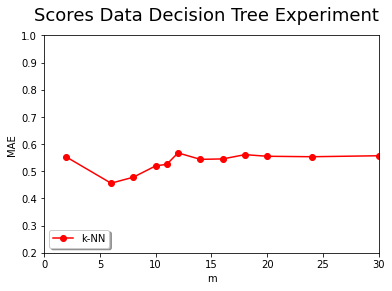

In [25]:
m_vals = [2, 6, 8, 10, 11, 12, 14, 16, 18, 20, 24, 30]
dt_MAE = []

for m in m_vals:
  dt_small = tree.DecisionTreeRegressor(max_depth= m)
  dt_small.fit(train_data , train_sln)
  predictions = dt_small.predict(test_data)
  current_MAE = metrics.mean_absolute_error(test_sln,predictions)
  dt_MAE.append(current_MAE)

print(dt_MAE)

plt.suptitle('Scores Data Decision Tree Experiment',fontsize=18)
plt.xlabel('m')
plt.ylabel('MAE')
plt.plot(m_vals,dt_MAE,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,30,0.2,1])

plt.show()

In order to find the most efficient n for this Random Forest, I did a search of many different nodes to see which area had the lowest output. This graph plots the number of n's on the x axis and the Mean Absolute Error (MAE) on the y axis. You can see from the graph that there is a significant drop from 0 to 3 decision trees, but after that there is no huge drop in MAE score to warrant a closer look into how many decision trees are needed. The more n_estimators you add to the model, the lower the model's MAE will get. This is because there is more predictive data.

Random Forest graph

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

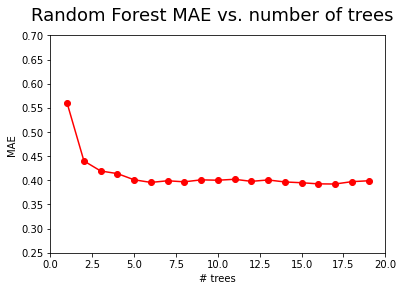

In [26]:
#the tuning function for any graph (change the RandomForestPart)
import matplotlib.pyplot as plt

def tune_number_of_trees(n_estimator_values):
    rf_mae = []

    for n in n_estimator_values:

        curr_rf = RandomForestRegressor(n_estimators=n, random_state=41)
        curr_rf.fit(train_data,train_sln)
        curr_predictions = curr_rf.predict(test_data)
        curr_mae = metrics.mean_absolute_error(test_sln,curr_predictions)
        rf_mae.append(curr_mae)

    plt.suptitle('Random Forest MAE vs. number of trees',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('MAE')
    plt.plot(n_estimator_values,rf_mae,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,.25,.7])

    plt.show()
    
tune_number_of_trees(range(1,20))


The importance chart shows us which features play the biggest role in trying to create new nodes in each decision tree. The features in internal nodes are selected with some criterion, this graph allows us to measure which feature is the most important in the forest. Accroding to this feature importance chart, the GDP per capita plays the biggest part in overall happiness. Thinking about this in from a real-world perspective it makes sense. If you live in a country that cannot support the citizens that live there, it will be much harder to live there than in a place that is rich and serving its citizens at every corner. The second highest was Healthy life expectancy, this again makes sense to me. If there is a country that is lacking behind in medical care, it is going to be harder to get the care you need when sick. Knowing that there is medical care in your nation that can solve most medical issues you have during you life, should make you a happier citizen.

Random Forest Feature Importance Chart

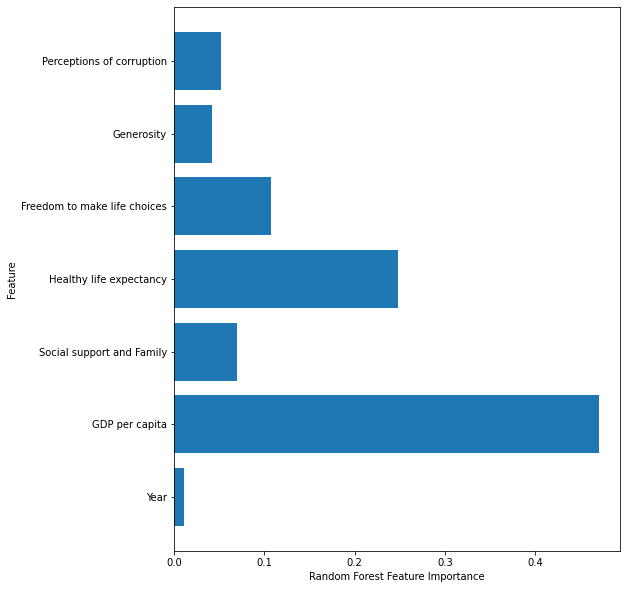

In [ ]:
%matplotlib inline

index = range(len(predictors)) #creates a list of numbers the right size to use as the index

plt.figure(figsize=(8,10)) #making the table a bit bigger so the text is readable
plt.barh(index,forest.feature_importances_,height=0.8) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,predictors) #put the feature names at the y tick marks
plt.xlabel("Random Forest Feature Importance")
plt.show()


# Bumps in the Road:
What challenges did you encounter? How did you overcome these challenges? Did you have to adapt your strategy to account for these challenges? Why or why not?


My first challenge was trying to get the dummy variables into the knn function I was running. I kept thinking that I needed to change a variable into a dummy variable, but because it is a regression, I only needed to create the baseline to see what the model would be predicting if it had no strategy. The second issue I ran into was having to clean the data. I was under the impression that the data was clean, but for some reason I was missing one piece of data in my file. Had I not dropped that data, there was continuous issues throughout my code and different numbers than the ones I had finalized. My strategy was to take things slow. I realized that I have every resource I need to get this project done, I can't get frusturated and I have to keep trying different things. Once I focused on the differences between codes that we have previously worked on and this one, I was able to do the project much easier.

# Conclusions
What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.